In [1]:
# Importo librerias de trabajo
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Data/laptops.csv', encoding='latin-1')

In [3]:
data.head(2)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94


In [4]:
data.dtypes

Unnamed: 0            int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                  object
Memory               object
Gpu                  object
OpSys                object
Weight               object
Price_euros         float64
dtype: object

In [5]:
data.isnull().sum()

Unnamed: 0          0
Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_euros         0
dtype: int64

In [6]:
data.drop(['Unnamed: 0', 'Company', 'Product', 'TypeName'], axis=1, inplace=True)

In [7]:
# Eliminar informacion duplicada
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)

In [8]:
col = [feature for feature in data.columns if data[feature].dtype == 'O']

for feature in col:
    labels_ordered= data.groupby([feature])['Price_euros'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    data[feature]=data[feature].map(labels_ordered)

In [9]:
data.head(2)

,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,13.3,26,85,3,14,80,8,138,1339.69
1,13.3,13,64,3,13,45,8,88,898.94


In [10]:
X = data.drop(['Price_euros'], axis=1)
y = data[['Price_euros']]

# Escalado de datos

In [11]:
from sklearn.preprocessing import StandardScaler
scalado = StandardScaler()

In [12]:
data_escalada = scalado.fit_transform(X)

In [13]:
data_escalada = pd.DataFrame(data=data_escalada, columns=['Inches','ScreenResolution',
                                                          'Cpu','Ram','Memory',
                                                          'Gpu','OpSys','Weight'])

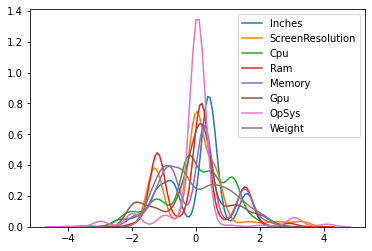

In [14]:
columns = ['Inches','ScreenResolution','Cpu','Ram','Memory','Gpu','OpSys','Weight']
for i in columns:
    sns.kdeplot(data_escalada[i])

In [15]:
data_escalada.shape, y.shape

((1274, 8), (1274, 1))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_escalada, y,
                                                    test_size=0.25, random_state=40)

# Regresion lineal

In [17]:
from sklearn.linear_model import LinearRegression
#Metricas 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [18]:
regresion = LinearRegression()

In [19]:
def evaluar_modelo(modelo,X_train,X_test,y_train,y_test):
    modelo.fit(X_train,y_train)
    print ("R2 del modelo  en train:", modelo.score(X_train,y_train) )
    print('RMSE en train:',np.sqrt(mean_squared_error(y_train, modelo.predict(X_train))))
    print ("R2 del modelo en test:", modelo.score(X_test,y_test) )
    print('RMSE en test:',np.sqrt(mean_squared_error(y_test, modelo.predict(X_test))))

In [20]:
def graficos(model,X_test,y_test):
    y_pred = model.predict(X_test)
    
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.distplot(y_pred, label='Predicciones')
    sns.distplot(y_test, label='Valor real')
    plt.legend()

    plt.subplot(1,2,2)
    ax = plt.subplot(1,2,2)
    ax.scatter(y_test,y_pred, s =2)

    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  
    np.max([ax.get_xlim(), ax.get_ylim()]),  
    ]

    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')

    plt.tight_layout()
    plt.show()

In [21]:
evaluar_modelo(regresion,X_train,X_test,y_train,y_test)

R2 del modelo  en train: 0.781102138668008
RMSE en train: 337.5056554751481
R2 del modelo en test: 0.7956205430001354
RMSE en test: 286.40449005057513


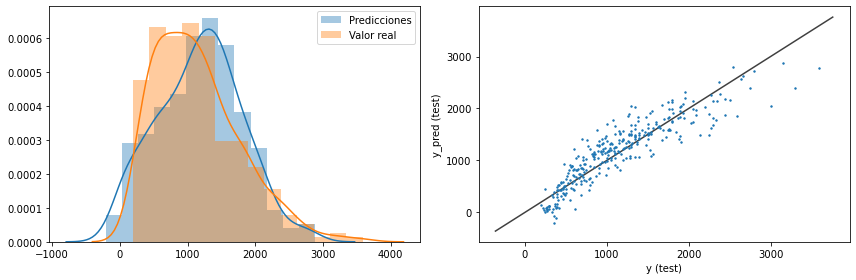

In [22]:
graficos(regresion, X_test,y_test)

# Ridge

In [23]:
from sklearn.linear_model import Ridge

In [24]:
reg_ridge = Ridge()

In [25]:
evaluar_modelo(reg_ridge, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.7811019524421695
RMSE en train: 337.50579904041626
R2 del modelo en test: 0.7956928388198834
RMSE en test: 286.35383016747693


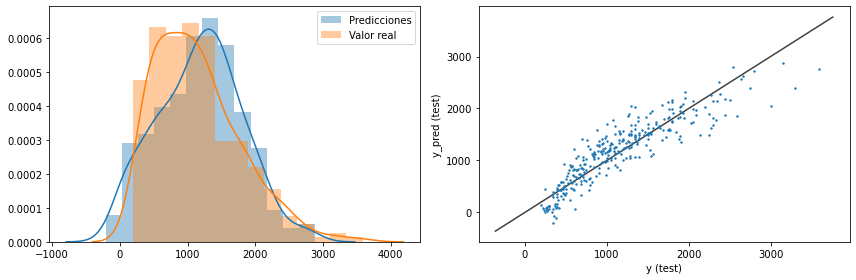

In [26]:
graficos(reg_ridge, X_test, y_test)

# Lasso

In [27]:
from sklearn.linear_model import Lasso
reg_lasso = Lasso()

In [28]:
evaluar_modelo(reg_lasso, X_train, X_test, y_train, y_test)

R2 del modelo  en train: 0.7810958207823173
RMSE en train: 337.51052602699497
R2 del modelo en test: 0.7961075481767808
RMSE en test: 286.0630573531559


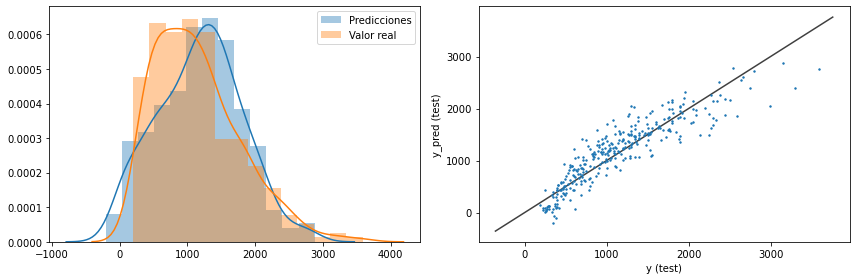

In [29]:
graficos(reg_lasso,X_test, y_test)

# PolynomialFeatures

Empleo PolynomialFeature tratar de mejorar el rendimiento del modelo, con el fin de obtener predicciones mas cercanas a los valores reales.

In [30]:
from sklearn.preprocessing import PolynomialFeatures
pol = PolynomialFeatures(degree=2, include_bias=False)
X_new = pol.fit_transform(data_escalada)

In [31]:
#División de nuevos datos con PolynomialFeatures, en datos de entrenamiento y de test
X_train_new,X_test_new,y_train_new,y_test_new = train_test_split(X_new, y,
                                                         test_size=0.30, random_state=40)

In [32]:
#Evaluo el model de Regresion Lineal con los nuevos datos provenientes de PolynomialFeatures
evaluar_modelo(regresion, X_train_new, X_test_new, y_train_new, y_test_new)

R2 del modelo  en train: 0.8744466200281364
RMSE en train: 249.44885033857264
R2 del modelo en test: 0.8468996691493271
RMSE en test: 270.53789544513785


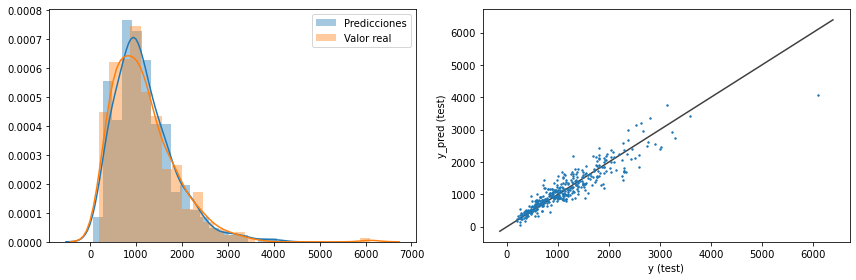

In [33]:
graficos(regresion, X_test_new, y_test_new)

In [34]:
#Evaluo el model Ridge con los nuevos datos provenientes de PolynomialFeatures
evaluar_modelo(reg_ridge, X_train_new, X_test_new, y_train_new, y_test_new)

R2 del modelo  en train: 0.8744459862547003
RMSE en train: 249.44947992678266
R2 del modelo en test: 0.8469331203004491
RMSE en test: 270.50833868861343


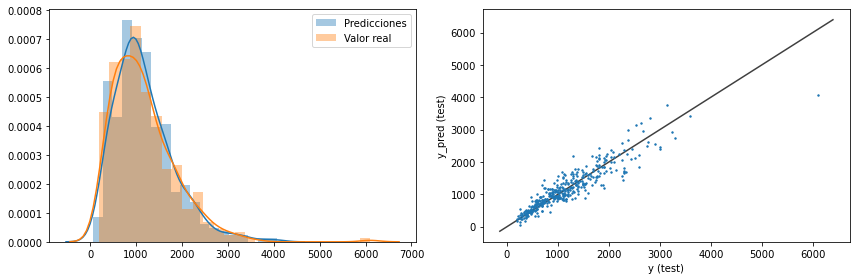

In [35]:
graficos(reg_ridge, X_test_new, y_test_new)

In [36]:
#Evaluo el model Lasso con los nuevos datos provenientes de PolynomialFeatures
evaluar_modelo(reg_lasso, X_train_new, X_test_new, y_train_new, y_test_new)

R2 del modelo  en train: 0.8741185951859527
RMSE en train: 249.77449686655862
R2 del modelo en test: 0.8482533017064076
RMSE en test: 269.3392632930953


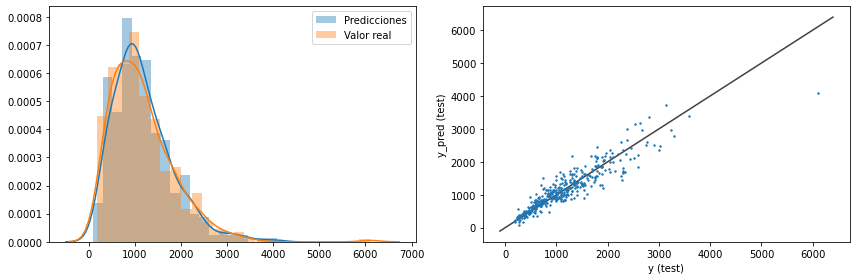

In [37]:
graficos(reg_lasso, X_test_new, y_test_new)

Ya que el modelo de Lasso obtuvo un R2 mas alto en comparacion con los otros dos modelos, selecciono este como mi mejor modelo. Realizo una Validacion cruzada con el fin de comprobar que el rendimiento del mi modelo no dependa de la particion de los datos realizada

# Validacion Cruzada

In [38]:
from sklearn.model_selection import cross_val_score, cross_validate

In [39]:
lasso_scores = cross_val_score(reg_lasso, X_train_new, y_train_new, cv=5)

In [40]:
print(lasso_scores)
print("Accuracy para Lasso: %0.2f (+/- %0.2f)" % (lasso_scores.mean(), lasso_scores.std() * 2))

[0.87331726 0.84432991 0.8293469  0.88813068 0.83149927]
Accuracy para Lasso: 0.85 (+/- 0.05)


Mi modelo Lasso, presenta una insignificante variacion del rendimiento en funcion de la particion de los datos en Train y Test.

# Curva de validacion cruzada

Realizo una busqueda rapida del mejor valor del hiperparametro `alpha`, a su vez realizando validacion cruzada.

In [41]:
reg_train_scores_mean = []
reg_train_scores_std = []
reg_test_scores_mean = []
reg_test_scores_std = []

alpha = [1, 0.5, 0.1 ,0.01, 0.005, 0.001, 0.0001]

for i in alpha:
    reg_lasso = Lasso(alpha= i)
    lasso_scores = cross_validate(reg_lasso, X_train_new, y_train_new, cv=5,
                                  return_train_score=True, n_jobs = -1)
    
    reg_train_scores_mean.append(lasso_scores['train_score'].mean())
    reg_train_scores_std.append(lasso_scores['train_score'].std())
    
    reg_test_scores_mean.append(lasso_scores['test_score'].mean())
    reg_test_scores_std.append(lasso_scores['test_score'].std())

reg_train_scores_mean = np.array(reg_train_scores_mean)
reg_train_scores_std = np.array(reg_train_scores_std)
reg_test_scores_mean = np.array(reg_test_scores_mean)
reg_test_scores_std = np.array(reg_test_scores_std)

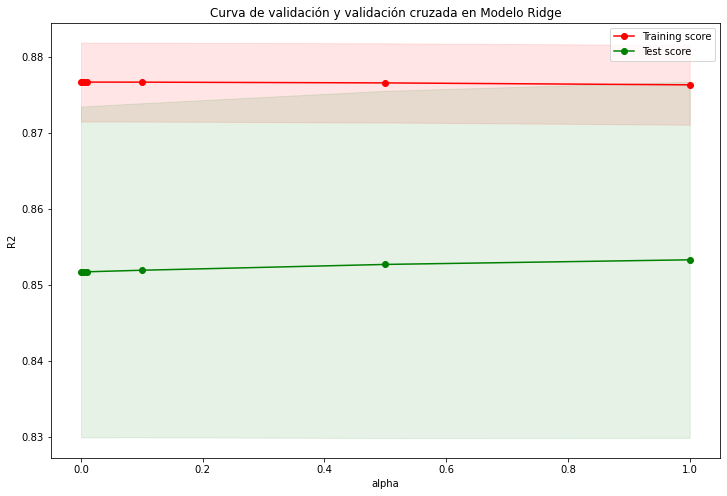

In [42]:
plt.figure(figsize=(12,8))
plt.fill_between(alpha, reg_train_scores_mean - reg_train_scores_std,
                 reg_train_scores_mean + reg_train_scores_std, alpha=0.1,
                 color="r")
plt.fill_between(alpha, reg_test_scores_mean - reg_test_scores_std,
                 reg_test_scores_mean + reg_test_scores_std, alpha=0.1, color="g")
plt.plot(alpha, reg_train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(alpha, reg_test_scores_mean, 'o-', color="g",
         label="Test score")
plt.legend()
plt.title('Curva de validación y validación cruzada en Modelo Ridge')
plt.ylabel('R2')
plt.xlabel('alpha')
plt.show()

El modelo Lasso presenta un mejor rendimiento con un valor de 1 en su hiperparametro `alpha` 

Conclusión
- El modelo Lasso, presento mejor RMSE y un R2 mas alto, al realizar una busqueda del mejor valor de su hiperparametro `alpha` este resulto sel su valor por default (1)
- Un adecuado procesamiento de la data, afectara positivamente al modelo de Machine Learning, por lo que el rendimiento es optimizable realizando adecuaciones a las que el modelo empleado sea sensible.